# DSO105 Intermediate Stats L4 - R

## Basic ANOVAs

In [1]:
#### Page 1

In [2]:
## load libraries

install.packages('rcompanion')
install.packages('car')

library(tidyverse)
library(IDPmisc)
library(rcompanion)
library(car)
library(readxl)

Installing package into 'C:/Users/nolan/OneDrive/Documents/R/win-library/4.1'
(as 'lib' is unspecified)



package 'rcompanion' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\nolan\AppData\Local\Temp\Rtmp2BHKpw\downloaded_packages


Installing package into 'C:/Users/nolan/OneDrive/Documents/R/win-library/4.1'
(as 'lib' is unspecified)



package 'car' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\nolan\AppData\Local\Temp\Rtmp2BHKpw\downloaded_packages


-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.3     v purrr   0.3.4
v tibble  3.1.2     v dplyr   1.0.6
v tidyr   1.1.3     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1

-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Loading required package: carData


Attaching package: 'car'


The following object is masked from 'package:dplyr':

    recode


The following object is masked from 'package:purrr':

    some




## Introduction

Through this course, thus far you have only dealt with statistical tests with one x variable and one y variable. Now, you'll begin working with statistics that can handle more than one x! 

This branch of statistics is called multivariate statistics, since it deals with multiple variables. The first multivariate statistic you will encounter is the ANOVA, which stands for analysis of variance.

### What is an Anova?

* ANalysis Of VAriance

* Compare 2 or more means: -- IV = 1+categorical w/2+ levels. -- DV = 1 continuous

* One-Way = 1 IV (most simple)

### Assumptions for ANOVAs

* Normality (bell-curve)

* Homogeneity of Variance - equal amount of change among the groups

* Sample Size - 20 rows per IV

* Independence - groups are unrelated

#### To Test Homogeneity of Variance:

* Bartlett's or Fligner's test -- bartlett.test(DV ~ IV, data=df), fligner.test(DV ~ IV, data=df)

* you want a p value > .05 to pass the assumption

* if you don't pass, use the Welch's One-Way Test



### ANOVA

* with homogeneity of variance -- modelName = aov(DV ~ IV)

* w/o homogeneity of variance -- modelName = lm(DV ~ IV, data=df) -> Anova(modelName, Type='II', white.adjust = TRUE)

#### What are Post Hocs

* post hoc literally means "after this" in latin

* What you do AFTER an analysis to make sense of it

* pairwise.t.test(DV, IV, p.adjust='bonferroni')

* then use dplyr aggregation to get means for each category



In [3]:
## load data from video

BorderCrossing = read.csv('../datasets/BorderCrossing.csv')

In [5]:
head(BorderCrossing)

,Port.Name,State,Port.Code,Border,Date,Measure,Value
,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>
1,Alcan,AK,3104,US-Canada Border,2/1/2020 0:00,Personal Vehicle Passengers,1414
2,Alcan,AK,3104,US-Canada Border,2/1/2020 0:00,Personal Vehicles,763
3,Alcan,AK,3104,US-Canada Border,2/1/2020 0:00,Truck Containers Empty,412
4,Alcan,AK,3104,US-Canada Border,2/1/2020 0:00,Truck Containers Full,122
5,Alcan,AK,3104,US-Canada Border,2/1/2020 0:00,Trucks,545
6,Alexandria Bay,NY,708,US-Canada Border,2/1/2020 0:00,Bus Passengers,1174


In [4]:
xlsx_example <- readxl_example("/BorderCrossing.xlsx")

ERROR: Error in system.file("extdata", path, package = "readxl", mustWork = TRUE): no file found


In [6]:
example1 = 'C:/Users/nolan/OneDrive/Documents/GitHub/CurriculumPlayground/datasets/BorderCrossing.xlsx'

In [7]:
exampleComplete = read_excel(example1)

ERROR: Error in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, : function 'Rcpp_precious_remove' not provided by package 'Rcpp'


In [8]:
## had to convert it to csv to get it loaded

#### Test Assumptions

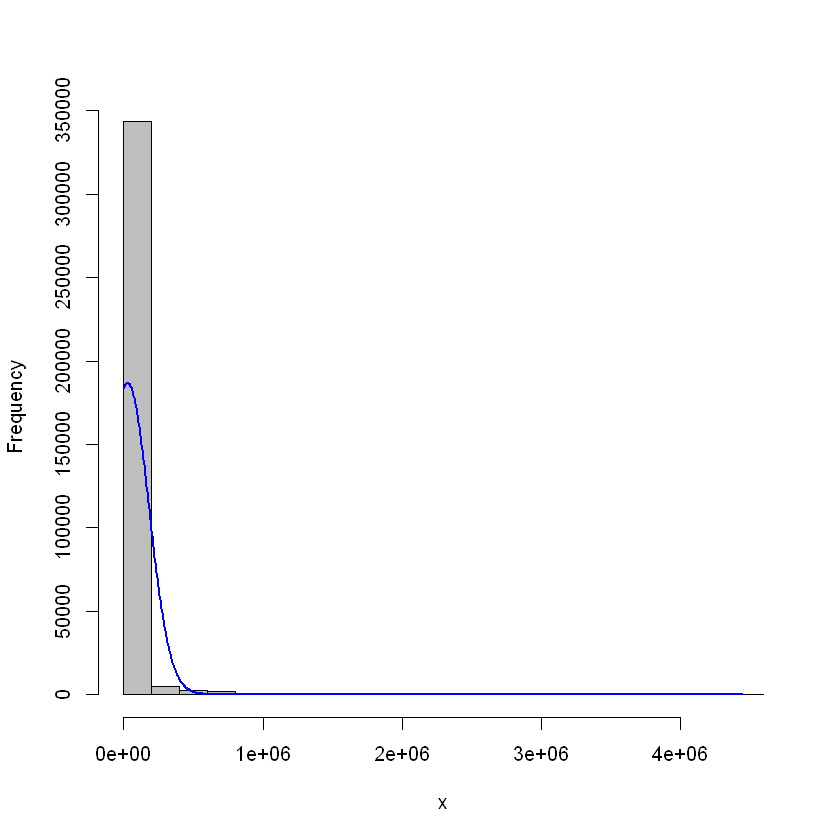

In [9]:
plotNormalHistogram(BorderCrossing$Value)

#### square root

In [14]:
BorderCrossing$ValueSQRT = BorderCrossing$Value ^ (1/2)

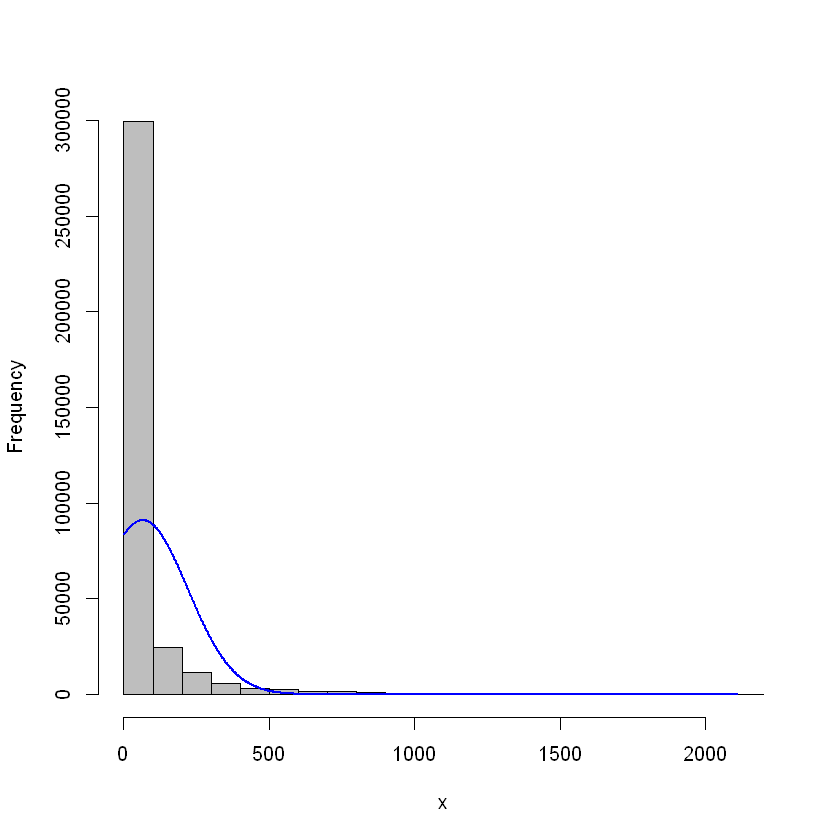

In [15]:
plotNormalHistogram(BorderCrossing$ValueSQRT)

#### log

In [16]:
BorderCrossing$ValueLOG = log(BorderCrossing$Value)

In [17]:
plotNormalHistogram(BorderCrossing$ValueLOG)

ERROR: Error in seq.default(min(x), max(x), length = length): 'from' must be a finite number


In [18]:
## infinites are missing. drop them

In [19]:
BorderCrossing2 = NaRV.omit(BorderCrossing)

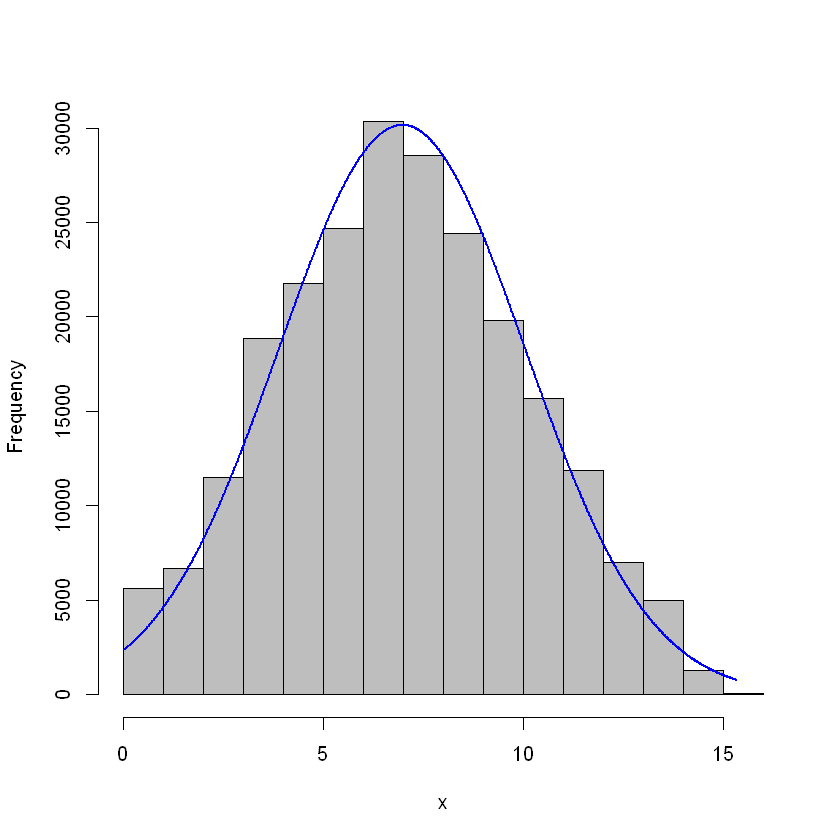

In [20]:
plotNormalHistogram(BorderCrossing2$ValueLOG)
## looks normal

#### Homogeneity of Variance

either bartlett or fligner test

In [22]:
bartlett.test(ValueLOG ~ Measure, data = BorderCrossing2)


	Bartlett test of homogeneity of variances

data:  ValueLOG by Measure
Bartlett's K-squared = 21600, df = 11, p-value < 2.2e-16


In [23]:
## this p-value shows significance, which means we have violated the assumption of homogeneity of variance
## we either have heterogeneity of variance, or unequal variance

### ANOVA without homogeneity of variance

In [26]:
anova = lm(ValueLOG ~ Measure, data = BorderCrossing2)

In [29]:
Anova(anova, Type ='II', white.adjust = TRUE)

Coefficient covariances computed by hccm()



,Df,F,Pr(>F)
,<dbl>,<dbl>,<dbl>
Measure,11,18104.53,0
Residuals,233107,NA,NA


In [28]:
## this is not showing the p-value like in the video/R Studio

#### Post Hocs

In [30]:
pairwise.t.test(BorderCrossing$Value, BorderCrossing$Measure, p.adjust = 'bonferroni', pool.sd = FALSE)


	Pairwise comparisons using t tests with non-pooled SD 

data:  BorderCrossing$Value and BorderCrossing$Measure 

                            Bus Passengers Buses   Pedestrians
Buses                       < 2e-16        -       -          
Pedestrians                 < 2e-16        < 2e-16 -          
Personal Vehicle Passengers < 2e-16        < 2e-16 < 2e-16    
Personal Vehicles           < 2e-16        < 2e-16 < 2e-16    
Rail Containers Empty       < 2e-16        < 2e-16 < 2e-16    
Rail Containers Full        < 2e-16        < 2e-16 < 2e-16    
Train Passengers            < 2e-16        7.4e-11 < 2e-16    
Trains                      < 2e-16        < 2e-16 < 2e-16    
Truck Containers Empty      < 2e-16        < 2e-16 < 2e-16    
Truck Containers Full       1.3e-13        < 2e-16 < 2e-16    
Trucks                      < 2e-16        < 2e-16 < 2e-16    
                            Personal Vehicle Passengers Personal Vehicles
Buses                       -                          

In [34]:
crossingMeans = BorderCrossing %>% group_by(Measure) %>% summarise(Mean = mean(Value)) %>% arrange(desc(Mean))

In [35]:
View(crossingMeans)

Measure,Mean
<chr>,<dbl>
Personal Vehicle Passengers,179352.83408
Personal Vehicles,84376.62418
Pedestrians,37116.27784
Trucks,8563.49689
Truck Containers Full,6041.53997
Bus Passengers,4953.43874
Truck Containers Empty,2176.42398
Rail Containers Full,1447.40671
Rail Containers Empty,799.08617


### End of video

In [36]:
#### Page 2 (starts with video)

Types of Anova: 1. Between Subjects Anova - categorical w/2+ lvls (IV), 1 continuous (DV) -- LEVELS OF THE INDEPENDENT VARIABLE ARE NOT RELATED

#### like 3 tacos from differnt restaurants, and their respective heat rating

2. Within Subjects Anova - categorical w/2+ related groups (IV), 1 continuous (DV)

#### like testing stomach lining thickness across 3 weeks after eating the tacos

## ANOVA Types by the Number of IVs

* One Way - only one IV

* Factorial - more than one IV - named by number of IVs (2IVs = 2 Way ANOVA, 3IVs = 3 Way Anova, etc.)

## Two-Way ANOVA example

IV1 is 1 of 3 Mexican restaurants. IV2 is the amount of chili pepper in each taco. DV is heat rating, continuous variable

### Mixed Measures ANOVA

IV1 is testing tacos over 3 weeks after eating. IV2 is different amount of pepper. DV is continuous variable: thickness of stomach lining

# What is an ANOVA?

ANOVAs are wonderful! You will quickly fall in love with them! They are versatile, robust, and relatively simple to understand and conduct. 

ANOVAs are where your true intermediate statistics journey begins.

You can think of an ANOVA as a t-test on steroids. Depending on the type of ANOVA, it can either replace your independent t test, your dependent t test, or it can even handle BOTH scenarios at once. 

Is your mind blown yet? Ready to convert to ANOVAs for life?

You will use an ANOVA to compare the means of the different levels of an independent variable(s). The independent variable will be a categorical variable. 

Unlike your independent t-test, which can only handle two levels of the independent variable, or two groups at a time, the ANOVA can handle more than two levels of your independent variable. 

The dependent variable will remain continuous, and there is still only one. 

So, if you have a theoretical example in which you want to determine whether color affects the fluffiness of a dog's coat, in a t-test, you could only compare two different coat colors at a time. Maybe black and white. 

But with an ANOVA, you can look at more than two levels of the independent variable, so you can compare more coat colors at a time - maybe black, white, apricot, and brown. 

In this scenario, the coat color is the independent variable, also sometimes called the grouping variable, because it is made up of groups, 

and the dependent variable is a continuous measure of coat fluffiness, for each dog you have in your sample.

Basically, the concept behind the ANOVA is that you are seeing if the variance in the dependent variable is in any way related to the grouping of the independent variable. 

Is there a pattern, in which certain groups have higher or lower means?

# Types of ANOVAs

There are two different types of ANOVAs: between subjects and within subjects ANOVAs.

<img src="../media/between-within-subjects.jpg" align="left" alt="COE image" width = "600">

# Between Subjects ANOVAs

Between Subjects ANOVAs fall in the same class as independent t-tests and independent Chi-Squares. All of these analyses look for differences between two separate, or independent, groups. 

There is no overlap between one group and the next. It is called a between subjects ANOVA because you are looking at mean difference between people, often called subjects in a research study.

Tip!: Sometimes in the biological fields, this is called a Type I ANOVA instead of a between subjects ANOVA.

# Within Subjects ANOVAs

Within Subjects ANOVAs fall in the same class as dependent t-tests. They are used when you have paired data or related samples. 

Most often, this is done by looking at change over time. However, a dependent t-test can only handle a pre- and post-test design, whereas, since ANOVAs can have multiple levels, they can handle additional timepoints. 

Anything from "beginning, middle, end" designs to looking at time bins for time periods can be done with an ANOVA.

Within subjects ANOVAs get their name because you are looking at the same person, or research subject, over and over again. 

Because within subjects ANOVAs are so often used to look at things over time, they are often called repeated measures ANOVAs as well.

Tip!: Sometimes in the biological fields, this is called a Type II ANOVA instead of a within subjects ANOVA.

# Number of Independent Variables

With both between and within subjects ANOVAs, you can also add a clarifier on that deals with the number of independent variables. 

So there are also one-way and factorial ANOVAs, which can be either between or within subjects.

# One-Way ANOVAs

When an ANOVA has only one independent variable, regardless of the number of levels, than this is called a one-way ANOVA.

In [39]:
## only 1 x

# Factorial ANOVAs


When there is more than one independent variable, than as a whole, it is a factorial ANOVA. 

However, ANOVAs are typically named by the number of independent variables they contain, so if you had two independent variables, it would be called a two-way ANOVA, 

and if you had three independent variables, it would be called a three-way ANOVA, etc. 

Although there is no limit to the number of independent variables you can have in an ANOVA, as long as you have enough data, 

practically going above a three or four way ANOVA becomes very difficult to interpret, so it is not recommended.

In [40]:
## more than 1 x

# Mixed Measures ANOVAs

In a factorial ANOVA, where there are multiple variables, you can mix and match your variables, so that there is one or more between subjects variables as well as a within subject variable. 

This is called a mixed measures or mixed design ANOVA.

In [41]:
## combines within subjects and between subjects

In [1]:
#### Page 3 (Basic ANOVAs)

In [2]:
## from video

# only Within Subjects designs needs to worrya obut Sphericity

Minimum smaple size for an ANOVA is at least 20 cases per independent variable

# Assumptions for ANOVAs

Just like any statistical test, there are assumptions for ANOVAs that you need to meet in order for them to be the most effective and the least biased.

### Normality

This assumption should be very familiar to you! Just like most statistics, ANOVAs require your data to be normally distributed, or distributed as close to normal as possible. 

If your data are not normal, they will need to be transformed to approximate the normal distribution. Luckily, the ANOVA is relatively robust, so especially as your sample size increases, 

and if you keep your group sizes relatively equal, it can handle some deviations from normality.

### Homogeneity of Variance

On the simplest level, homogeneity of variance means the variance, or the spread of data, is equal. The root homo means same, so think of homogeneity as "same variance." In the context of an ANOVA assumption, 

it means that the variance of one variable should not affect the variance of another variable.

It's probably easier to look at an illustration: